In [1]:
import pandas as pd
import os
import json

In [2]:
env_list = [
    'hopper-expert-v2', 'halfcheetah-expert-v2', 'walker2d-expert-v2',
    'hopper-medium-expert-v2', 'halfcheetah-medium-expert-v2', 'walker2d-medium-expert-v2',
    'hopper-medium-v2', 'halfcheetah-medium-v2', 'walker2d-medium-v2',
    'hopper-medium-replay-v2', 'halfcheetah-medium-replay-v2', 'walker2d-medium-replay-v2',
]

In [3]:
def save_to_csv(env):
    folder1 = f'../logs/cond_a_film/{env}/plans/'
    folder2 = f'../logs/cond_a_nofilm/{env}/plans/'

    # get all the file names
    subfolders1 = os.listdir(folder1)
    subfolders2 = os.listdir(folder2)

    # get the sub names
    subfolders1 = [os.path.join(folder1, f) for f in subfolders1]
    subfolders2 = [os.path.join(folder2, f) for f in subfolders2]

    # combine all
    subfolders = subfolders1 + subfolders2
    # print(subfolders)

    def extract_settings(subfolder):
        parts = subfolder.split("_")
        H = int(parts[0][1:])
        T = int(parts[1][1:])
        w = float(parts[2][1:])
        m = float(parts[3][1:])
        ws = parts[4][2:] == "True"
        return H, T, w, m, ws

    # get the data
    data = []
    for subfolder in subfolders:
        with open(os.path.join(subfolder, "rollout.json")) as f:
            curr_data = json.load(f)
            assert(curr_data["epoch_diffusion"] == 300000)
            H, T, w, m, ws = extract_settings(subfolder.split("/")[-1])
            nofilm = "nofilm" in subfolder
            row = {
                "film": not nofilm,
                "horizon": H,
                "diffusion_steps": T,
                "guidance_weight": w,
                "ensemble_temperature": m,
                "weight_starting": ws,
                "mean_return": curr_data["mean_return"],
            }
            data.append(row)
    
    # create the dataframe
    df = pd.DataFrame(data)
    df.head()

    # sort by mean return
    df = df.sort_values(by="mean_return", ascending=False)
    df.head(10) # print the top 10 results

    # save df
    if not os.path.exists("results"):
        os.makedirs("results")
    df.to_csv(f"results/{env}.csv", index=False)

    return df

In [4]:
import pandas as pd

df_dict = {}
top_results = []

for env in env_list:
    df_dict[env] = save_to_csv(env)

    # Append the top result for each env to the list
    top_result = df_dict[env].head(1)
    top_result['Environment'] = env
    top_results.append(top_result)

# Combine all top results into one DataFrame
top_results_df = pd.concat(top_results)

# Reset the index
top_results_df.reset_index(drop=True, inplace=True)
top_results_df.set_index('Environment', inplace=True)

top_results_df

/tmp/ipykernel_1404496/3711041150.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_result['Environment'] = env
/tmp/ipykernel_1404496/3711041150.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_result['Environment'] = env
/tmp/ipykernel_1404496/3711041150.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

,film,horizon,diffusion_steps,guidance_weight,ensemble_temperature,weight_starting,mean_return
Environment,,,,,,,
hopper-expert-v2,False,32,20,0.5,-1.0,False,3546.590165
halfcheetah-expert-v2,True,8,20,3.0,-1.0,False,11462.243888
walker2d-expert-v2,False,32,20,3.0,-1.0,False,5092.772190
hopper-medium-expert-v2,True,16,20,0.7,0.5,False,3571.771625
halfcheetah-medium-expert-v2,True,8,20,3.0,-1.0,False,9238.790776
walker2d-medium-expert-v2,True,32,20,0.7,0.5,False,4423.079106
hopper-medium-v2,True,32,20,3.0,0.5,False,2129.453662
halfcheetah-medium-v2,True,8,20,3.0,0.5,False,5492.016439
walker2d-medium-v2,False,32,20,0.7,0.5,False,3047.696350


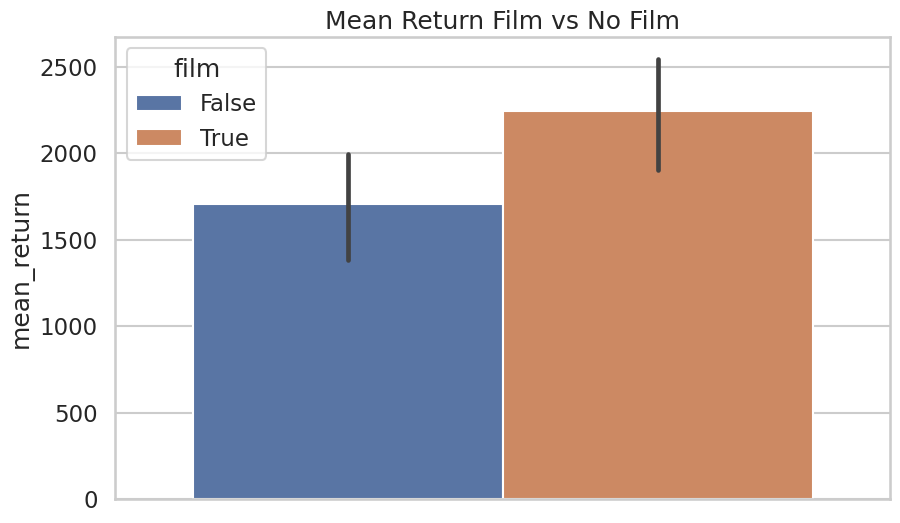

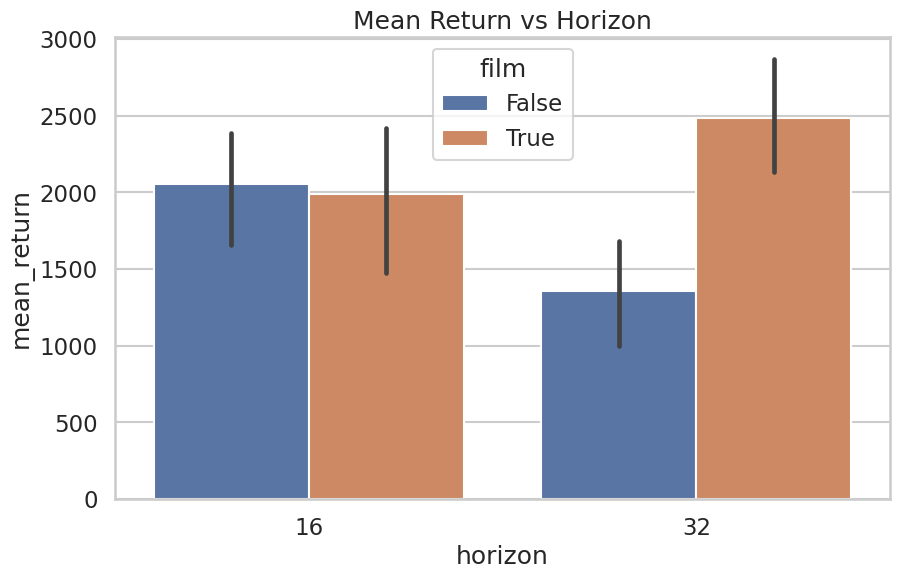

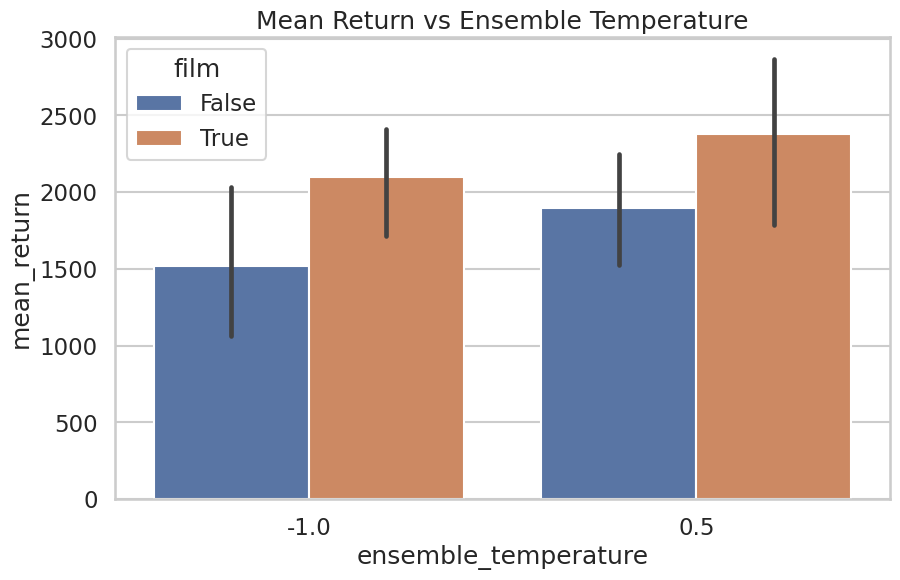

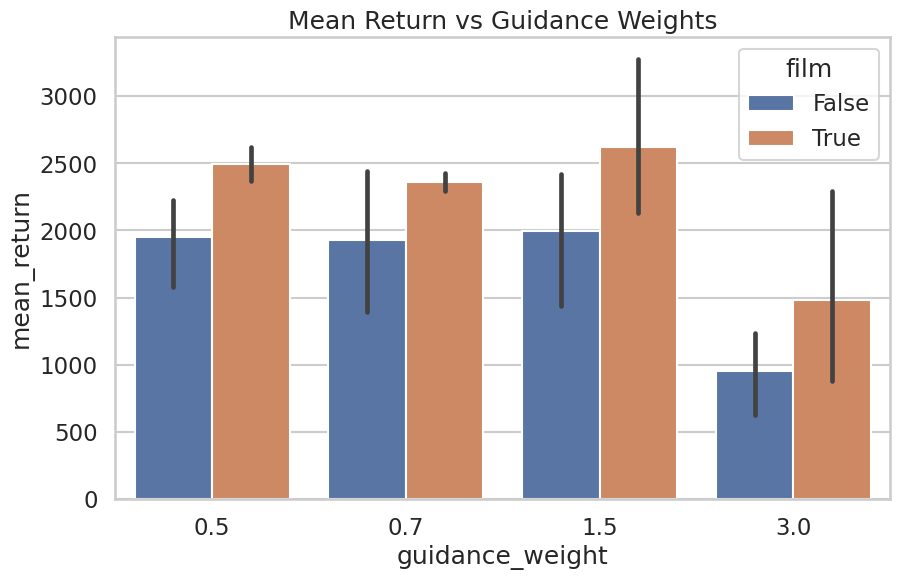

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# env = 'hopper-medium-expert-v2'
# env = 'halfcheetah-medium-expert-v2'
# env = 'walker2d-medium-expert-v2'

# env = 'hopper-medium-v2'
# env = 'halfcheetah-medium-v2'
# env = 'walker2d-medium-v2'

# env = 'hopper-medium-replay-v2'
# env = 'halfcheetah-medium-replay-v2'
env = 'walker2d-medium-replay-v2'


sns.set(style="whitegrid")
sns.set_context("talk")
plt.figure(figsize=(10, 6))
sns.barplot(y="mean_return", hue="film", data=df_dict[env])
plt.title("Mean Return Film vs No Film")
plt.show()

sns.set(style="whitegrid")
sns.set_context("talk")
plt.figure(figsize=(10, 6))
sns.barplot(x="horizon", y="mean_return", hue="film", data=df_dict[env])
plt.title("Mean Return vs Horizon")
plt.show()

sns.set(style="whitegrid")
sns.set_context("talk")
plt.figure(figsize=(10, 6))
sns.barplot(x="ensemble_temperature", y="mean_return", hue="film", data=df_dict[env])
plt.title("Mean Return vs Ensemble Temperature")
plt.show()

sns.set(style="whitegrid")
sns.set_context("talk")
plt.figure(figsize=(10, 6))
sns.barplot(x="guidance_weight", y="mean_return", hue="film", data=df_dict[env])
plt.title("Mean Return vs Guidance Weights")
plt.show()

In [6]:
# Combine all dataframes in df_dict into one dataframe and add environment name as a column
combined_df = pd.concat(df_dict, ignore_index=False)

# Reset the index and rename the index column to 'Environment'
combined_df.reset_index(inplace=True)
combined_df.drop(columns='level_1', inplace=True)
combined_df.rename(columns={'level_0': 'Environment'}, inplace=True)

combined_df

,Environment,film,horizon,diffusion_steps,guidance_weight,ensemble_temperature,weight_starting,mean_return
0,hopper-medium-expert-v2,True,16,20,0.7,0.5,False,3571.771625
1,hopper-medium-expert-v2,True,16,20,1.5,0.5,False,3535.402076
2,hopper-medium-expert-v2,True,16,20,0.5,0.5,False,3487.391096
3,hopper-medium-expert-v2,True,16,20,3.0,0.5,False,3480.406478
4,hopper-medium-expert-v2,True,16,20,0.7,-1.0,False,3468.007809
...,...,...,...,...,...,...,...,...
283,walker2d-medium-replay-v2,False,32,20,0.7,-1.0,False,1099.461339
284,walker2d-medium-replay-v2,False,16,20,3.0,-1.0,False,1035.851548
285,walker2d-medium-replay-v2,False,32,20,3.0,0.5,False,912.931081
286,walker2d-medium-replay-v2,True,16,20,3.0,0.5,False,653.701210


In [7]:
from sklearn.ensemble import RandomForestRegressor

# drop horizon 4 and 8
combined_df = combined_df[combined_df['horizon'] != 4]
combined_df = combined_df[combined_df['horizon'] != 8]

# Assume that 'target' is the name of your target variable
X = combined_df.drop(['mean_return', 'Environment', 'diffusion_steps', 'weight_starting'], axis=1)
y = combined_df['mean_return']

# Fit a random forest model to the data
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame with the feature importances
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the DataFrame by importance in descending order
feature_importances_df.sort_values('Importance', ascending=False, inplace=True)

feature_importances_df

,Feature,Importance
2,guidance_weight,0.417535
0,film,0.233180
3,ensemble_temperature,0.182108
1,horizon,0.167177


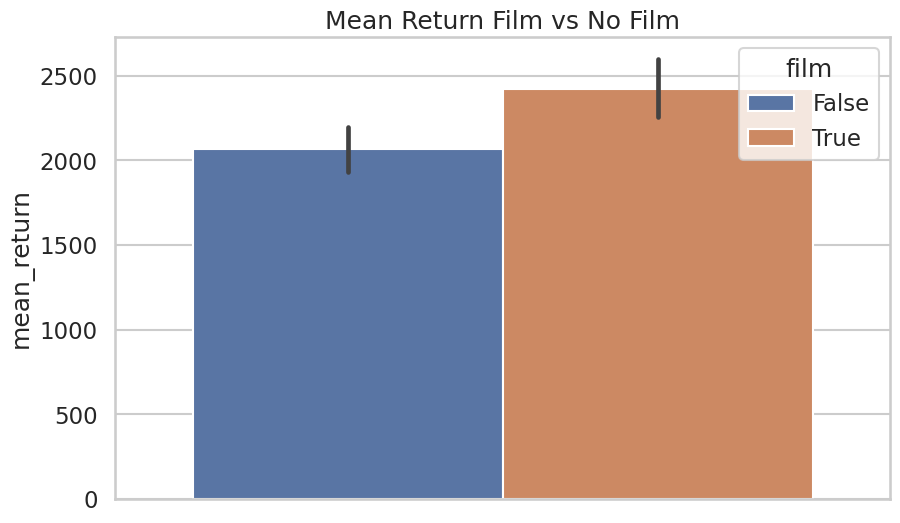

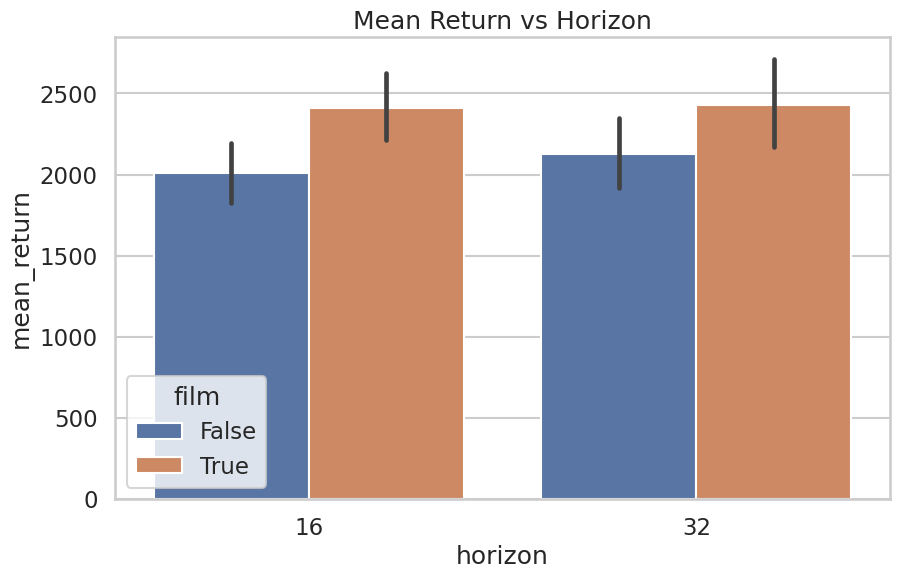

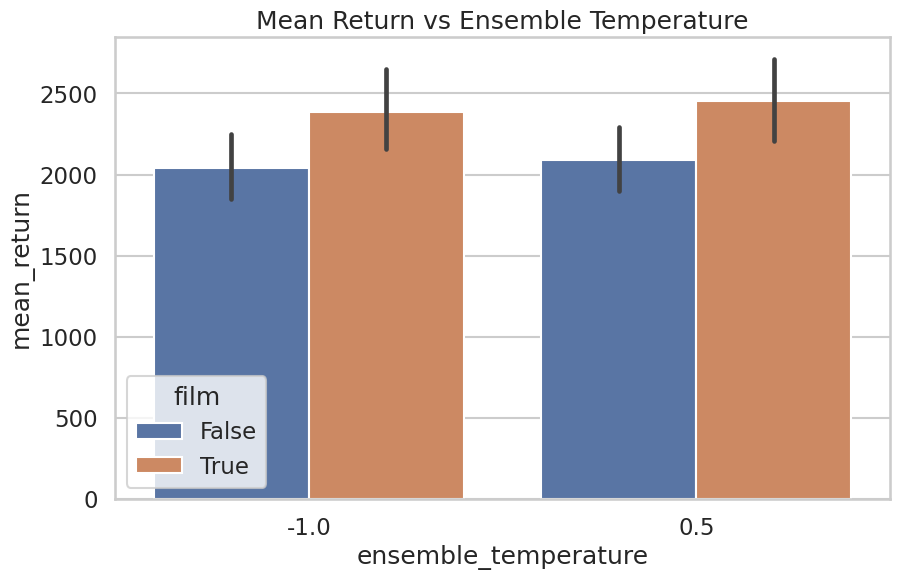

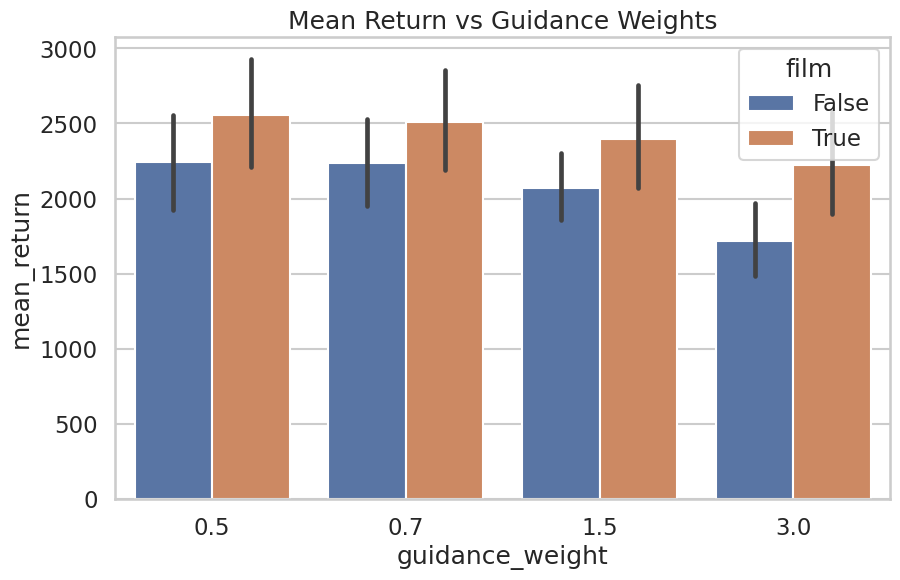

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

env = "walker2d-medium-replay-v2"

sns.set(style="whitegrid")
sns.set_context("talk")
plt.figure(figsize=(10, 6))
sns.barplot(y="mean_return", hue="film", data=combined_df)
plt.title("Mean Return Film vs No Film")
plt.show()

sns.set(style="whitegrid")
sns.set_context("talk")
plt.figure(figsize=(10, 6))
sns.barplot(x="horizon", y="mean_return", hue="film", data=combined_df)
plt.title("Mean Return vs Horizon")
plt.show()

sns.set(style="whitegrid")
sns.set_context("talk")
plt.figure(figsize=(10, 6))
sns.barplot(x="ensemble_temperature", y="mean_return", hue="film", data=combined_df)
plt.title("Mean Return vs Ensemble Temperature")
plt.show()

sns.set(style="whitegrid")
sns.set_context("talk")
plt.figure(figsize=(10, 6))
sns.barplot(x="guidance_weight", y="mean_return", hue="film", data=combined_df)
plt.title("Mean Return vs Guidance Weights")
plt.show()